Import the neccessary libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import zipfile


Open zip folder to import the data

In [28]:
# Specify the path to your zip file
zip_file_path = 'C://Users//User//Desktop//archive (1).zip'

# Specify the CSV file name within the zip file
csv_file_name = 'Training Data.csv'

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
    # Read the CSV file directly into a DataFrame
    data = pd.read_csv(zip_file.open(csv_file_name))

# Display the DataFrame
data.head()


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [29]:
# Data Exploration
data.head()  # Display the first few rows of the dataset


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [30]:
data.info()  # Get information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


The list of columns in the data

In [31]:
data.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [32]:
# Set the style for seaborn
sns.set(style="whitegrid")

Pairwise relationships between variables within a dataset

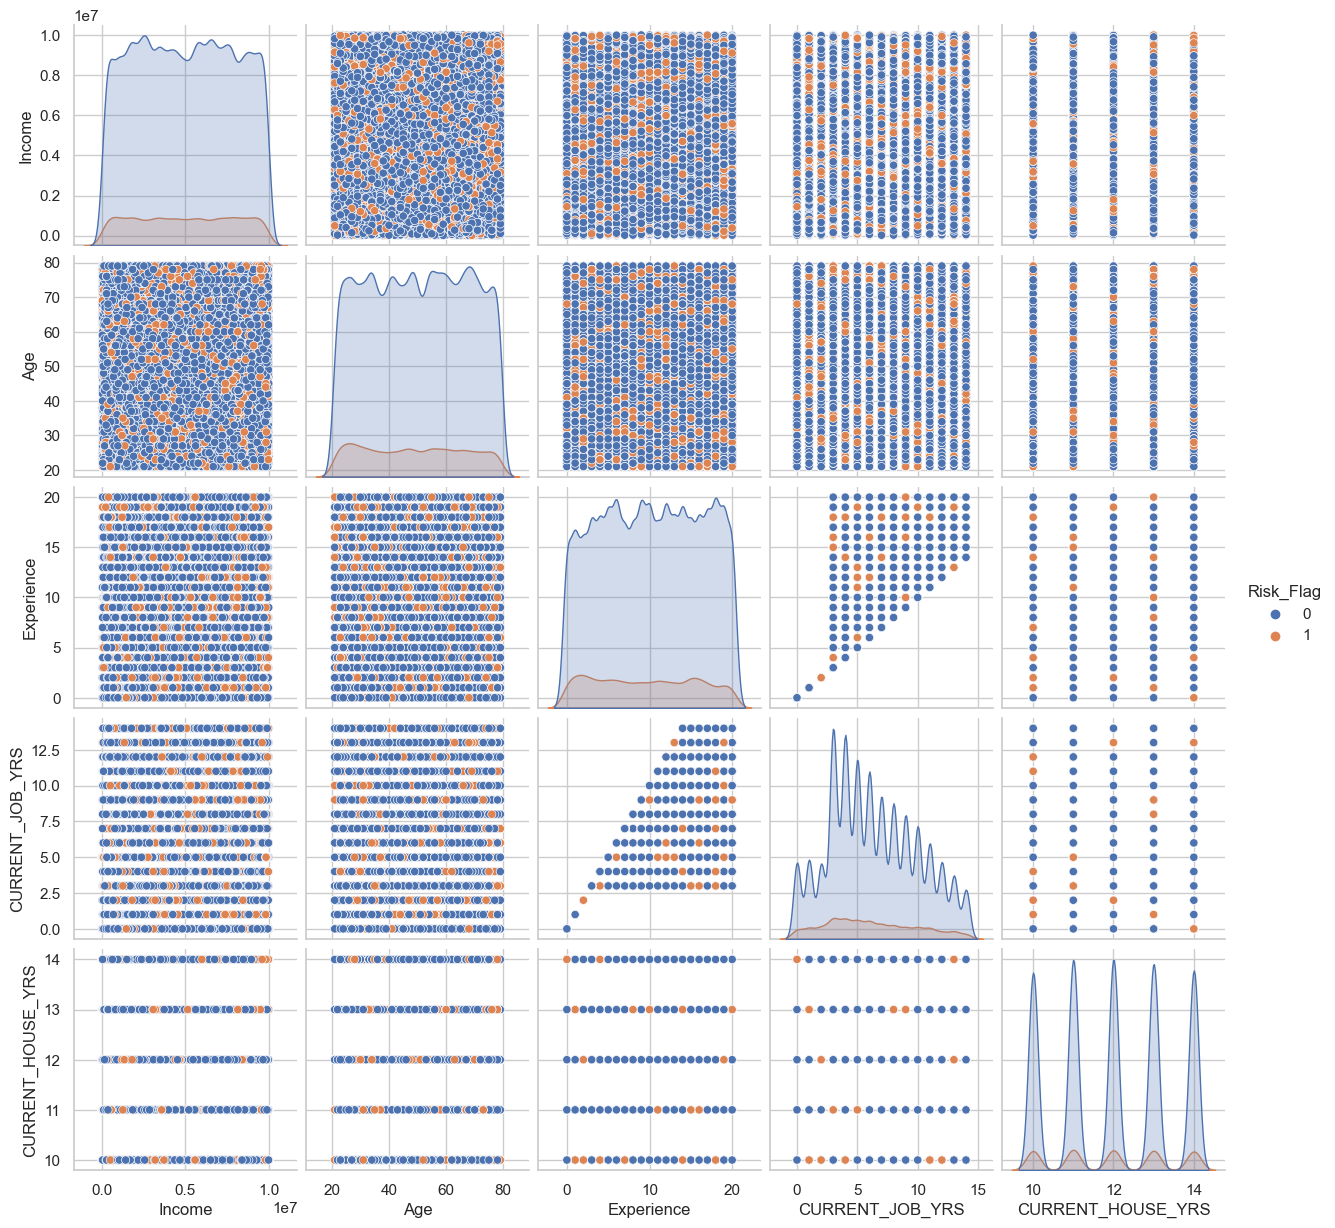

In [13]:
# Pairplot to show relationships between numerical columns
sns.pairplot(data[['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']], hue='Risk_Flag', diag_kind='kde')
plt.show()

Income Distribution by Risk Flag

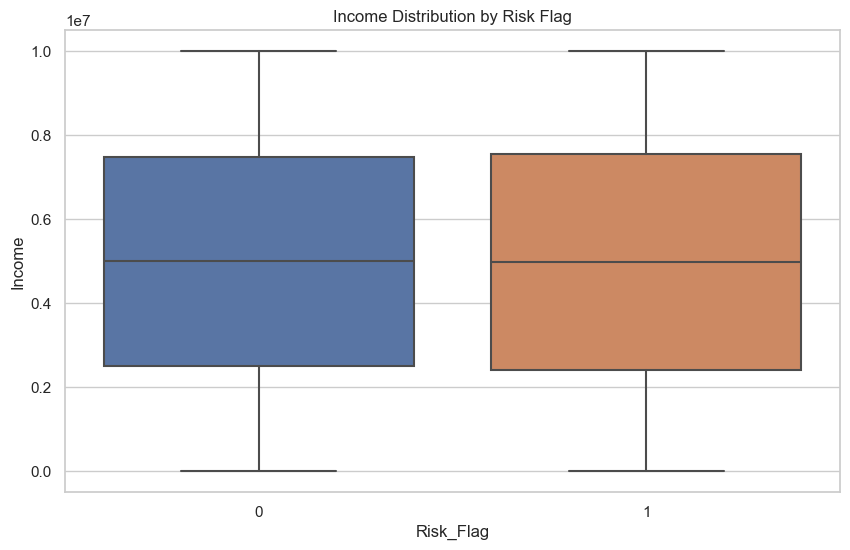

In [33]:
# Boxplot to visualize income distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk_Flag', y='Income', data=data)
plt.title('Income Distribution by Risk Flag')
plt.show()



There is no changes in distribution of income of both defaulters and non defaulters 

Marital Status Distribution

<Axes: xlabel='Risk_Flag'>

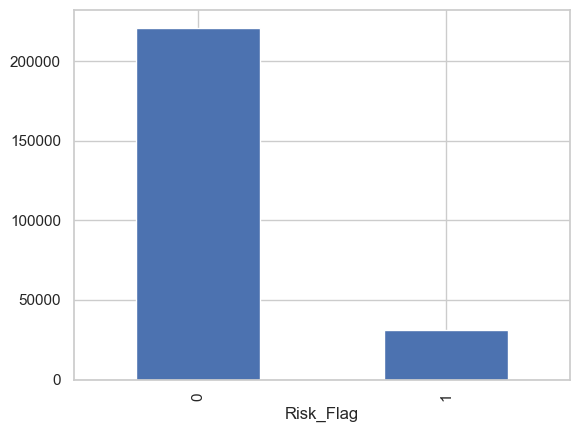

In [34]:
data.groupby('Risk_Flag')['Married/Single'].count().plot(kind="bar")

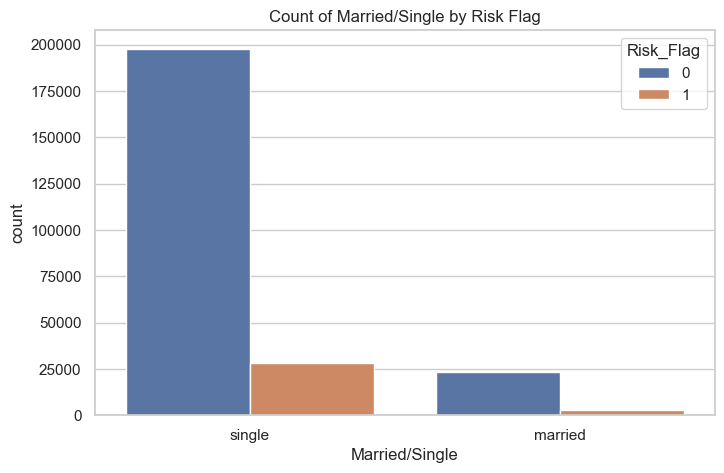

In [35]:
# Countplot for Marital Status
plt.figure(figsize=(8, 5))
sns.countplot(x='Married/Single', data=data, hue='Risk_Flag')
plt.title('Count of Married/Single by Risk Flag')
plt.show()


Car Ownership Distribution

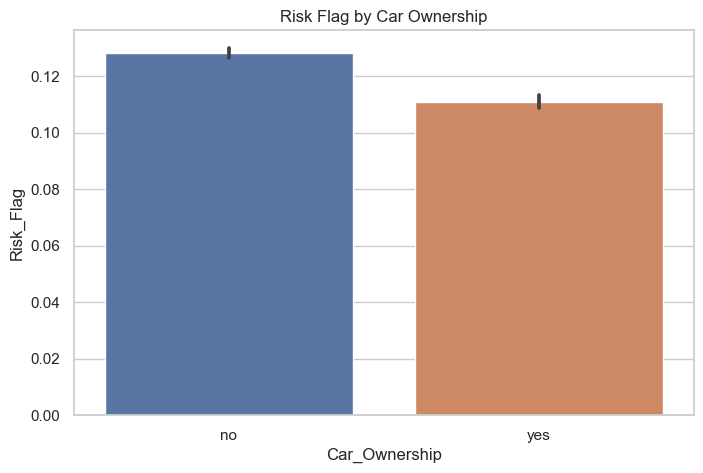

In [36]:
# Barplot for Car Ownership
plt.figure(figsize=(8, 5))
sns.barplot(x='Car_Ownership', y='Risk_Flag', data=data)
plt.title('Risk Flag by Car Ownership')
plt.show()


Age Distribution

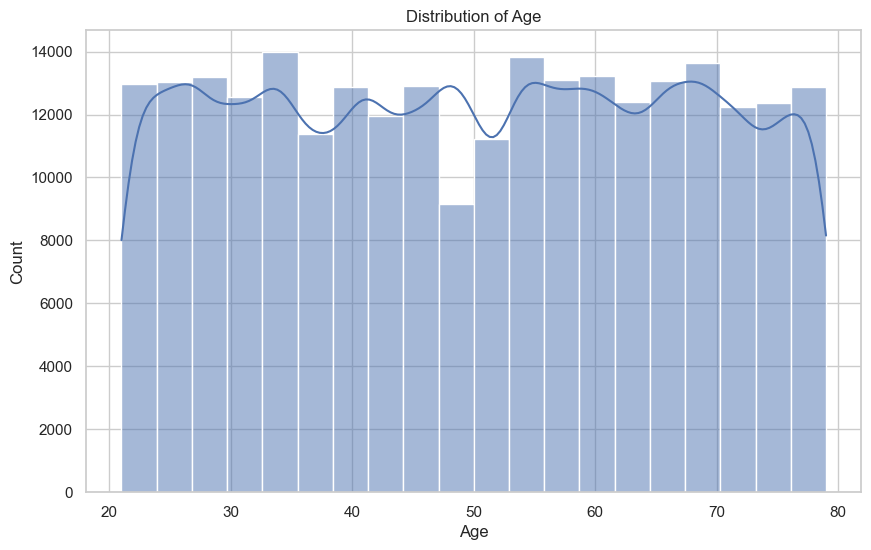

In [37]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()



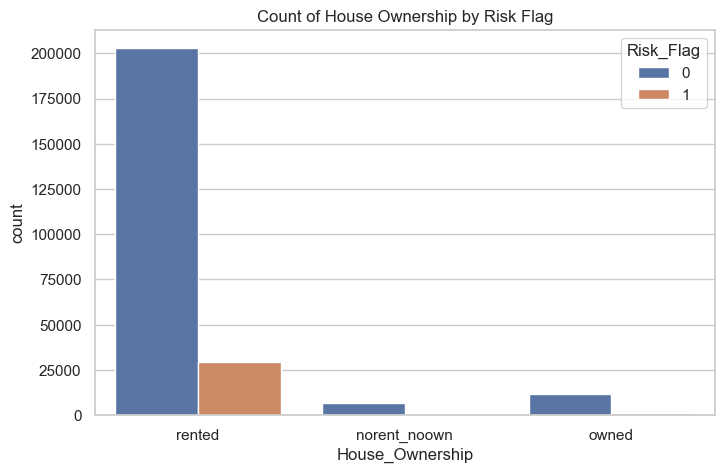

In [38]:
# Countplot for House Ownership
plt.figure(figsize=(8, 5))
sns.countplot(x='House_Ownership', data=data, hue='Risk_Flag')
plt.title('Count of House Ownership by Risk Flag')
plt.show()



Risk Flag by Profession

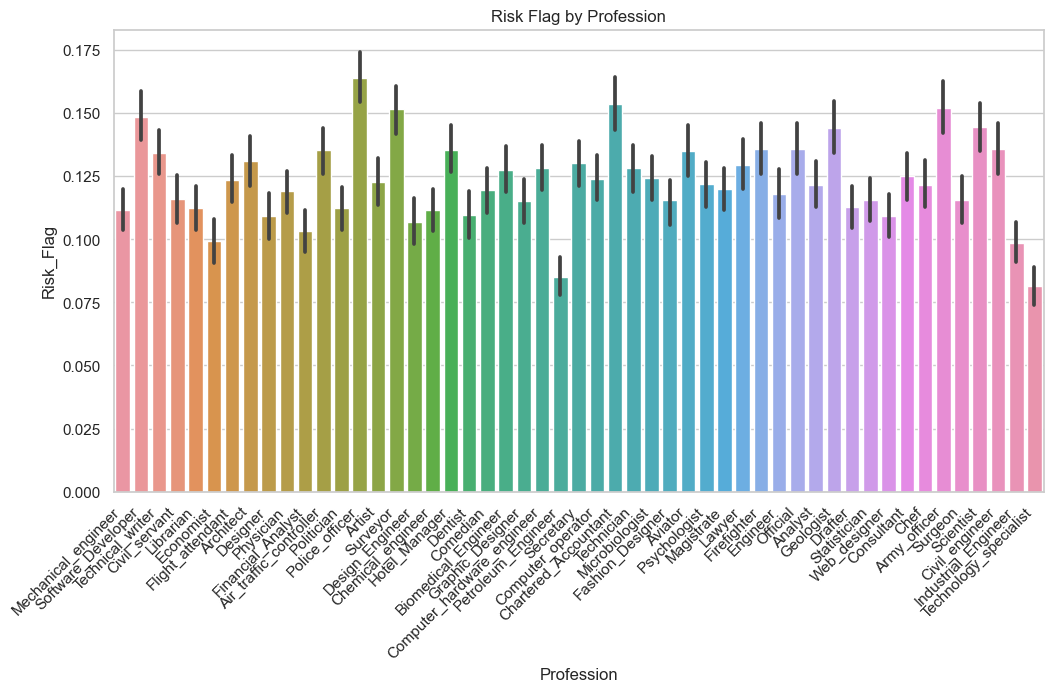

In [39]:

# Barplot for Profession
plt.figure(figsize=(12, 6))
sns.barplot(x='Profession', y='Risk_Flag', data=data)
plt.title('Risk Flag by Profession')
plt.xticks(rotation=45, ha='right')
plt.show()




Experience Distribution by Car Ownership

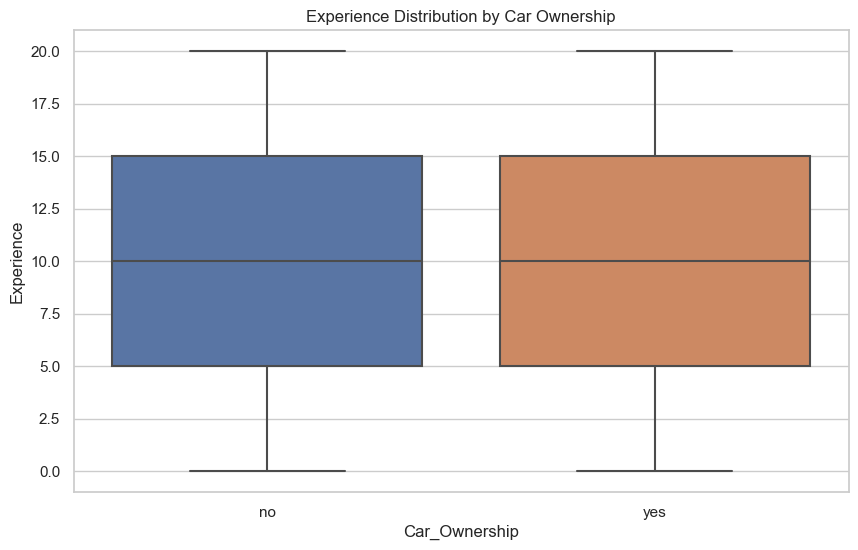

In [40]:


# Boxplot for Experience by Car Ownership
plt.figure(figsize=(10, 6))
sns.boxplot(x='Car_Ownership', y='Experience', data=data)
plt.title('Experience Distribution by Car Ownership')
plt.show()



Correlation Matrix

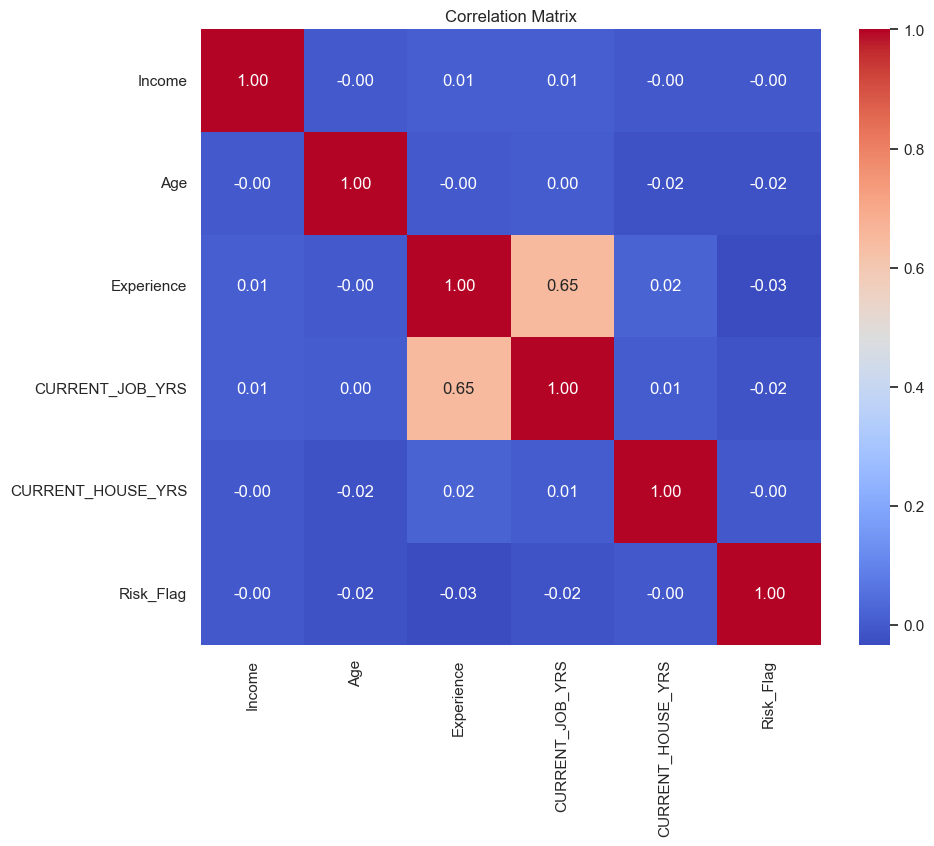

In [41]:

# Heatmap for Correlation Matrix
correlation_matrix = data[['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [42]:
# Check for missing values
missing_data = data.isnull().sum()
print(missing_data)

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64


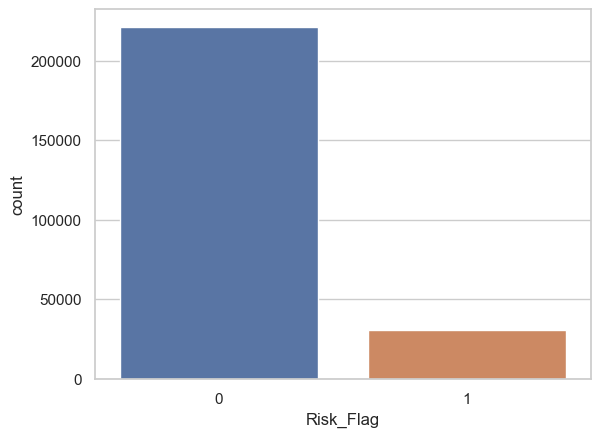

In [43]:
# Visualize the target variable
sns.countplot(x='Risk_Flag', data=data)
plt.show()

 Summary statistics for numerical features

In [44]:
# Descriptive Statistics
data.describe()
#print(data['categorical_column'].value_counts())  # Distribution of a categorical variable

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [45]:
data.head(2)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0


Data types

In [46]:
data.dtypes

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

Create a categorical column list

In [47]:
categorical_column = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']

data[categorical_column].value_counts()  # Distribution of a categorical variable
#data[categorical_column]

Married/Single  House_Ownership  Car_Ownership  Profession            CITY           STATE         
single          rented           no             Secretary             Vijayanagaram  Andhra_Pradesh    144
                                                Librarian             Burhanpur      Madhya_Pradesh    115
                                                Chartered_Accountant  Bangalore      Karnataka         114
                                                Chemical_engineer     Nashik         Maharashtra       114
                                                Hotel_Manager         Indore         Madhya_Pradesh    113
                                                                                                      ... 
                                                Chartered_Accountant  Shimoga        Karnataka           1
                                                                      Shahjahanpur   Uttar_Pradesh       1
                                            

In [48]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for column in categorical_column:
    data[column] = encoder.fit_transform(data[column])


In [49]:
data[categorical_column].head(2)

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
0,1,2,0,33,251,13
1,1,2,0,43,227,14


In [52]:
data.head(2)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,1,2,0,33,251,13,3,13,0
1,2,7574516,40,10,1,2,0,43,227,14,9,13,0


In [53]:
# Data Split
y = data["Risk_Flag"]
X = data.drop("Risk_Flag", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
#X_train.drop('Id')
X_train.drop(columns = ['Id'], inplace = True)
X_test.drop(columns = ['Id'], inplace = True)

In [55]:
y_train

200471    0
92611     0
86397     0
110500    0
185133    0
         ..
119879    1
103694    0
131932    0
146867    0
121958    0
Name: Risk_Flag, Length: 201600, dtype: int64

Using Random Forest Model

In [56]:
# Model Training
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = acurcacy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))



Accuracy: 0.8988492063492064
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     44147
           1       0.60      0.54      0.57      6253

    accuracy                           0.90     50400
   macro avg       0.77      0.74      0.76     50400
weighted avg       0.89      0.90      0.90     50400



In [63]:

from sklearn.metrics import confusion_matrix, precision_score
recall_score, f1_score, accuracy_score, roc_auc_score


print("ROC AUC score: " + str(roc_auc_score(y_test, y_pred)))

ROC AUC score: 0.7430112953216709


In [68]:
# Feature Importance
feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)

Feature Importance: [0.19215196 0.1429803  0.08328821 0.01042524 0.00969622 0.01335451
 0.14367637 0.16474024 0.10136738 0.07377472 0.06454484]


Using XGBoost Model

In [66]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
# Define the model

    
# defining the model
clf = XGBClassifier(learning_rate=0.1, 
                    n_estimators=1000, 
                    use_label_encoder=False,
                    random_state=42)
    
clf.fit(X_train, y_train, eval_metric='logloss')
y_pred = clf.predict(X_test) 
print("accuracy_score: " + str(accuracy_score(y_test, y_pred)))

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


accuracy_score: 0.8970436507936508


In [67]:
print("ROC AUC score: " + str(roc_auc_score(y_test, predictions)))

ROC AUC score: 0.7133595105554174


In [64]:
# Feature Importance
feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)

Feature Importance: [0.19215196 0.1429803  0.08328821 0.01042524 0.00969622 0.01335451
 0.14367637 0.16474024 0.10136738 0.07377472 0.06454484]
